# Lesson 6 Assignment - Video Store Data Analysis

## Author - Yulia Zubova

### Background
Consider the data collected by a hypothetical video store for 50 regular customers.

This data consists of a table which, for each customer, records the following attributes:
* Gender
* Income
* Age
* Rentals - Total number of video rentals in the past year
* Avg. per visit - Average number of video rentals per visit during the past year
* Incidentals - Whether the customer tends to buy incidental items such as refreshments when renting a video
* Genre - The customer's preferred movie genre

## Tasks
Use the provided Video_Store.csv file, perform each of the following data preparation tasks and answer the related questions:

a) Split the age attribute into bins, using a bin depth of 4.

b) Use min-max normalization to transform the values of the Income attribute onto the range [0.0-1.0] and save results in new column. You'll need the income column again. 

c) Use z-score normalization to standardize the values of the Rentals attribute.

d) Discretize the (original) Income attribute based on the following categories: High = 60K+; Mid = 25K-59K; Low = less than $25K and keep in a separate column. Later you will compare which method has better results. 

e) Create a list of your categorical values so that you can encode them. 

f) On your categorical values, encode them and then perform basic correlation analysis among the attributes. Discuss your results by indicating any strong correlations (positive or negative) among pairs of attributes. You will need to construct a complete Correlation Matrix (Please read the brief document <a href="https://library.startlearninglabs.uw.edu/DATASCI420/PDF/DATASCI%20420%20Basic%20Correlation%20Analysis.pdf">Basic Correlation Analysis</a> for more detail). *Can you observe any "significant" patterns among groups of two or more variables? Explain.*

g) Use Pandas dataframe filtering to select all "good" customers with a high value for the Rentals attribute (a "good customer is defined as one with a Rentals value of greater than or equal to 30). From the subset, create a summary using the describe function (e.g., using means, medians, and/or other statistics). *What patterns do you see? Explain.*

**Note:** To know whether your observed patterns in the target group are significant, you need to compare them with the general population using the same metrics.

h) Suppose that because of the high profit margin, the store would like to increase the sales of incidentals. Based on your observations in previous parts discuss how this could be accomplished? (e.g., Should customers with specific characteristics be targeted? Should certain types of movies be preferred? etc.). Explain your answer based on your analysis of the data.


**Hints:**

- Review basic statistics for different attributes by using the pandas functions you learned about

- Consider discretizing the Age attribute.

- Make sure numerical variables are on the same scale

In [1]:
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/Video_Store.csv"


In [55]:
# Import libraries
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFE 
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn import preprocessing
import seaborn as sns
import pandas_profiling

C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\zub

In [32]:
#Load dataset
df = pd.read_csv(URL)

In [5]:
df.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre
0,1,M,45000,25,27,2.5,Yes,Action
1,2,F,54000,33,12,3.4,No,Drama
2,3,F,32000,20,42,1.6,No,Comedy
3,4,F,59000,70,16,4.2,Yes,Drama
4,5,M,37000,35,25,3.2,Yes,Action


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Cust ID          50 non-null int64
Gender           50 non-null object
Income           50 non-null int64
Age              50 non-null int64
Rentals          50 non-null int64
Avg Per Visit    50 non-null float64
Incidentals      50 non-null object
Genre            50 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 3.2+ KB


### a) Binning

In [33]:
#Split Age column into 4 bins with equak number of values and add column with bin label
df['Age Bin'] = pd.qcut(df['Age'], 4, labels = False)

In [12]:
df.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,Age Bin
0,1,M,45000,25,27,2.5,Yes,Action,1
1,2,F,54000,33,12,3.4,No,Drama,2
2,3,F,32000,20,42,1.6,No,Comedy,0
3,4,F,59000,70,16,4.2,Yes,Drama,3
4,5,M,37000,35,25,3.2,Yes,Action,2


### b) Min-max normalization ###

In [70]:
#Perform min-max normalization of Income column
min_max_scaler = preprocessing.MinMaxScaler()
z = np.array(df['Income'])

# Scale on Income column and save result into new column "Scaled Income"
df['Scaled Income'] = pd.DataFrame(min_max_scaler.fit_transform(z.reshape(-1, 1)))
df.head()

C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,Age Bin,Scaled Income,Rentals Scaled,Income Level
0,1,M,45000,25,27,2.5,Yes,Action,1,0.500000,0.076560,Mid
1,2,F,54000,33,12,3.4,No,Drama,2,0.602273,-1.434493,Mid
2,3,F,32000,20,42,1.6,No,Comedy,0,0.352273,1.587613,Mid
3,4,F,59000,70,16,4.2,Yes,Drama,3,0.659091,-1.031546,Mid
4,5,M,37000,35,25,3.2,Yes,Action,2,0.409091,-0.124914,Mid


### c) Z-score normalization ###

In [69]:
#Perform z-score normalization of Rentals column and save result into new column "Rentals Scaled"
df['Rentals Scaled'] = pd.DataFrame(preprocessing.scale(df['Rentals']))
df.head()

C:\Users\zubov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,Age Bin,Scaled Income,Rentals Scaled,Income Level
0,1,M,45000,25,27,2.5,Yes,Action,1,0.500000,0.076560,Mid
1,2,F,54000,33,12,3.4,No,Drama,2,0.602273,-1.434493,Mid
2,3,F,32000,20,42,1.6,No,Comedy,0,0.352273,1.587613,Mid
3,4,F,59000,70,16,4.2,Yes,Drama,3,0.659091,-1.031546,Mid
4,5,M,37000,35,25,3.2,Yes,Action,2,0.409091,-0.124914,Mid


### d) Discretizing

In [42]:
#Discretize column Income into three levels (High, Mid and Low) and save result in new column "Income Level"
df.loc[df['Income'] >= 60000 , 'Income Level'] = 'High'
df.loc[(df['Income'] < 60000) & (df['Income'] >= 25000) , 'Income Level'] = 'Mid'
df.loc[df['Income'] < 25000 , 'Income Level'] = 'Low'

In [44]:
df['Income Level'].value_counts()

Mid     29
Low     11
High    10
Name: Income Level, dtype: int64

### e) Categorical Data

In [45]:
df.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,Age Bin,Scaled Income,Rentals Scaled,Income Level
0,1,M,45000,25,27,2.5,Yes,Action,1,0.500000,0.076560,Mid
1,2,F,54000,33,12,3.4,No,Drama,2,0.602273,-1.434493,Mid
2,3,F,32000,20,42,1.6,No,Comedy,0,0.352273,1.587613,Mid
3,4,F,59000,70,16,4.2,Yes,Drama,3,0.659091,-1.031546,Mid
4,5,M,37000,35,25,3.2,Yes,Action,2,0.409091,-0.124914,Mid


In [46]:
#List of categorical data
cat_columns = ['Gender', 'Incidentals', 'Genre', 'Age Bin', 'Income Level']

### f) Encoding and correlation analysis ###

In [47]:
#Perform OneHot-encoding for categorical variables
import category_encoders as ce
le =  ce.OneHotEncoder(cols = cat_columns)
df_encoded = le.fit_transform(df)
df_encoded.head()

,Gender_1,Gender_2,Gender_-1,Incidentals_1,Incidentals_2,Incidentals_-1,Genre_1,Genre_2,Genre_3,Genre_-1,...,Income Level_2,Income Level_3,Income Level_-1,Cust ID,Income,Age,Rentals,Avg Per Visit,Scaled Income,Rentals Scaled
0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,45000,25,27,2.5,0.500000,0.076560
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,2,54000,33,12,3.4,0.602273,-1.434493
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,3,32000,20,42,1.6,0.352273,1.587613
3,0,1,0,1,0,0,0,1,0,0,...,0,0,0,4,59000,70,16,4.2,0.659091,-1.031546
4,1,0,0,1,0,0,1,0,0,0,...,0,0,0,5,37000,35,25,3.2,0.409091,-0.124914


In [50]:
#Print out the category mapping
le.category_mapping

[{'col': 'Gender', 'mapping': [('M', 1), ('F', 2)]},
 {'col': 'Incidentals', 'mapping': [('Yes', 1), ('No', 2)]},
 {'col': 'Genre', 'mapping': [('Action', 1), ('Drama', 2), ('Comedy', 3)]},
 {'col': 'Age Bin', 'mapping': [(1, 1), (2, 2), (0, 3), (3, 4)]},
 {'col': 'Income Level', 'mapping': [('Mid', 1), ('Low', 2), ('High', 3)]}]

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5]),
 <a list of 26 Text xticklabel objects>)

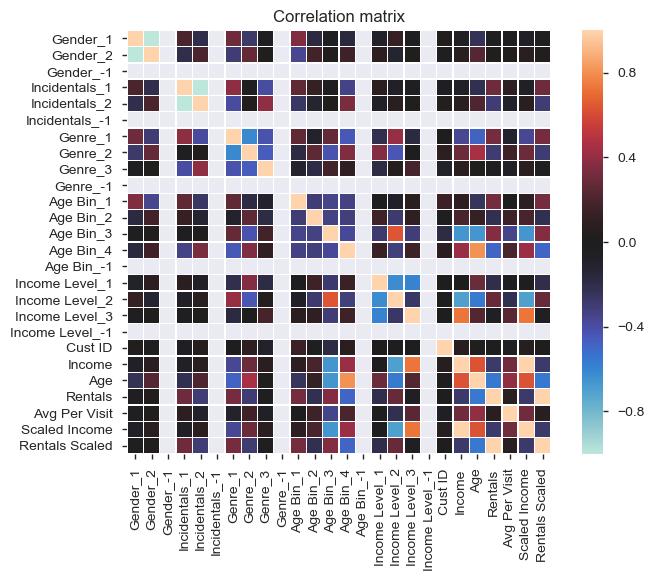

In [71]:
#Correlation matrix
df_encoded_corr = df_encoded.corr() #count dataset correlation coefficients
sns.heatmap(df_encoded_corr, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.25, cbar_kws={"shrink": 1})  #show correlation heatmap
plt.title('Correlation matrix')  #set plot title
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

In [72]:
#Dataset profile that also provides correlation matrix
pandas_profiling.ProfileReport(df_encoded)

Number of variables,26
Number of observations,50
Total Missing (%),0.0%
Total size in memory,6.5 KiB
Average record size in memory,133.6 B
Numeric,5
Categorical,0
Boolean,14
Date,0
Text (Unique),0
Rejected,7


#### Strong positive correlations ####
* Age and Income
* Rentals and Rentals Scaled (that's not surprising)
* Income and Scaled Income (it's not siurprising too)

#### Strong negative correlations ####
* Age and Rentals
* Age and Rentals Scaled


Inside groups of variables that we've got after encoding variables (for instance, Gender_1 and Gender_2 as result of encoding variable Gender), variables have strong negative correltion.

### g) "Goog users" filtering ###

In [73]:
#Create new dataframe that contains information about "good users" (users who have Rentals rate more or equal 30)
good_users_df = df_encoded.loc[df_encoded['Rentals'] >= 30 , :]
good_users_df.head()

,Gender_1,Gender_2,Gender_-1,Incidentals_1,Incidentals_2,Incidentals_-1,Genre_1,Genre_2,Genre_3,Genre_-1,...,Income Level_2,Income Level_3,Income Level_-1,Cust ID,Income,Age,Rentals,Avg Per Visit,Scaled Income,Rentals Scaled
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,3,32000,20,42,1.6,0.352273,1.587613
5,1,0,0,0,1,0,1,0,0,0,...,1,0,0,6,18000,20,33,1.7,0.193182,0.680981
7,1,0,0,1,0,0,1,0,0,0,...,0,1,0,8,74000,25,31,2.4,0.829545,0.479507
10,0,1,0,1,0,0,0,1,0,0,...,0,0,0,11,41000,22,48,2.3,0.454545,2.192034
14,1,0,0,1,0,0,0,0,1,0,...,0,1,0,15,68000,30,36,2.7,0.761364,0.983192


In [60]:
#Descriptive statistics for "good users" 
good_users_df.describe()

,Gender_1,Gender_2,Gender_-1,Incidentals_1,Incidentals_2,Incidentals_-1,Genre_1,Genre_2,Genre_3,Genre_-1,...,Income Level_2,Income Level_3,Income Level_-1,Cust ID,Income,Age,Rentals,Avg Per Visit,Scaled Income,Rentals Scaled
count,18.000000,18.000000,18.0,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.0,...,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.444444,0.555556,0.0,0.555556,0.444444,0.0,0.500000,0.222222,0.277778,0.0,...,0.388889,0.222222,0.0,26.833333,37666.666667,25.166667,37.277778,2.777778,0.416667,1.111911
std,0.511310,0.511310,0.0,0.511310,0.511310,0.0,0.514496,0.427793,0.460889,0.0,...,0.501631,0.427793,0.0,15.049917,23126.251953,8.290675,5.849138,0.927080,0.262798,0.589224
min,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,3.000000,2000.000000,15.000000,30.000000,1.600000,0.011364,0.378771
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,15.750000,19500.000000,20.000000,32.250000,2.150000,0.210227,0.605429
50%,0.000000,1.000000,0.0,1.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,26.500000,31500.000000,23.500000,36.500000,2.550000,0.346591,1.033560
75%,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.000000,0.750000,0.0,...,1.000000,0.000000,0.0,39.000000,56000.000000,28.750000,41.750000,3.375000,0.625000,1.562429
max,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,0.0,50.000000,74000.000000,47.000000,48.000000,4.700000,0.829545,2.192034


In [74]:
#Descriptive statistics for all users
df_encoded.describe()

,Gender_1,Gender_2,Gender_-1,Incidentals_1,Incidentals_2,Incidentals_-1,Genre_1,Genre_2,Genre_3,Genre_-1,...,Income Level_2,Income Level_3,Income Level_-1,Cust ID,Income,Age,Rentals,Avg Per Visit,Scaled Income,Rentals Scaled
count,50.000000,50.000000,50.0,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.0,...,50.000000,50.000000,50.0,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,0.520000,0.480000,0.0,0.520000,0.480000,0.0,0.360000,0.400000,0.240000,0.0,...,0.220000,0.200000,0.0,25.50000,42300.000000,31.560000,26.240000,2.748000,0.469318,1.487699e-16
std,0.504672,0.504672,0.0,0.504672,0.504672,0.0,0.484873,0.494872,0.431419,0.0,...,0.418452,0.404061,0.0,14.57738,21409.753642,12.000272,10.027635,0.898125,0.243293,1.010153e+00
min,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,1.00000,1000.000000,15.000000,9.000000,1.100000,0.000000,-1.736704e+00
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,13.25000,26750.000000,22.000000,19.000000,2.125000,0.292614,-7.293349e-01
50%,1.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,25.50000,41000.000000,30.000000,25.000000,2.750000,0.454545,-1.249137e-01
75%,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.0,37.75000,56750.000000,37.500000,32.750000,3.375000,0.633523,6.557970e-01
max,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,0.0,50.00000,89000.000000,70.000000,48.000000,4.700000,1.000000,2.192034e+00


###### SUMMARY 
In comparison with general population users with high Rental rate (>=30):
* Prefer action films;
* Have lower income;
* Are significantly younger (mean age 25.1 vs 31.6 years).

### h) Incidentals ###

In [64]:
#Create new dataframe that contains information about users who tend to make incidentals purchases (target audience)
incident_df = df_encoded.loc[df_encoded['Incidentals_1'] == 1 , :]
incident_df.head()

,Gender_1,Gender_2,Gender_-1,Incidentals_1,Incidentals_2,Incidentals_-1,Genre_1,Genre_2,Genre_3,Genre_-1,...,Income Level_2,Income Level_3,Income Level_-1,Cust ID,Income,Age,Rentals,Avg Per Visit,Scaled Income,Rentals Scaled
0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,45000,25,27,2.5,0.500000,0.076560
3,0,1,0,1,0,0,0,1,0,0,...,0,0,0,4,59000,70,16,4.2,0.659091,-1.031546
4,1,0,0,1,0,0,1,0,0,0,...,0,0,0,5,37000,35,25,3.2,0.409091,-0.124914
7,1,0,0,1,0,0,1,0,0,0,...,0,1,0,8,74000,25,31,2.4,0.829545,0.479507
10,0,1,0,1,0,0,0,1,0,0,...,0,0,0,11,41000,22,48,2.3,0.454545,2.192034


In [65]:
#Create new dataframe that contains information about users who don't tend to make incidentals purchases
notincident_df = df_encoded.loc[df_encoded['Incidentals_2'] == 1 , :]
notincident_df.head()

,Gender_1,Gender_2,Gender_-1,Incidentals_1,Incidentals_2,Incidentals_-1,Genre_1,Genre_2,Genre_3,Genre_-1,...,Income Level_2,Income Level_3,Income Level_-1,Cust ID,Income,Age,Rentals,Avg Per Visit,Scaled Income,Rentals Scaled
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,2,54000,33,12,3.4,0.602273,-1.434493
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,3,32000,20,42,1.6,0.352273,1.587613
5,1,0,0,0,1,0,1,0,0,0,...,1,0,0,6,18000,20,33,1.7,0.193182,0.680981
6,0,1,0,0,1,0,0,1,0,0,...,0,0,0,7,29000,45,19,3.8,0.318182,-0.729335
8,1,0,0,0,1,0,0,0,1,0,...,0,0,0,9,38000,21,18,2.1,0.420455,-0.830072


In [66]:
#Descriptive statistics for users who don't tend to make incidentals purchases
notincident_df.describe()

,Gender_1,Gender_2,Gender_-1,Incidentals_1,Incidentals_2,Incidentals_-1,Genre_1,Genre_2,Genre_3,Genre_-1,...,Income Level_2,Income Level_3,Income Level_-1,Cust ID,Income,Age,Rentals,Avg Per Visit,Scaled Income,Rentals Scaled
count,24.000000,24.000000,24.0,24.0,24.0,24.0,24.000000,24.000000,24.000000,24.0,...,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000
mean,0.416667,0.583333,0.0,0.0,1.0,0.0,0.166667,0.416667,0.416667,0.0,...,0.250000,0.208333,0.0,26.125000,43708.333333,34.208333,23.166667,2.67500,0.485322,-0.309598
std,0.503610,0.503610,0.0,0.0,0.0,0.0,0.380693,0.503610,0.503610,0.0,...,0.442326,0.414851,0.0,15.436581,21446.554738,12.812966,9.666917,1.01991,0.243711,0.973815
min,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,2.000000,2000.000000,15.000000,9.000000,1.10000,0.011364,-1.736704
25%,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,12.250000,27750.000000,21.000000,14.750000,1.70000,0.303977,-1.157467
50%,0.000000,1.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,27.500000,46000.000000,34.000000,21.500000,2.70000,0.511364,-0.477493
75%,1.000000,1.000000,0.0,0.0,1.0,0.0,0.000000,1.000000,1.000000,0.0,...,0.250000,0.000000,0.0,39.250000,57000.000000,46.000000,32.000000,3.45000,0.636364,0.580244
max,1.000000,1.000000,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,0.0,50.000000,89000.000000,56.000000,42.000000,4.70000,1.000000,1.587613


In [67]:
#Descriptive statistics for target audience
incident_df.describe()

,Gender_1,Gender_2,Gender_-1,Incidentals_1,Incidentals_2,Incidentals_-1,Genre_1,Genre_2,Genre_3,Genre_-1,...,Income Level_2,Income Level_3,Income Level_-1,Cust ID,Income,Age,Rentals,Avg Per Visit,Scaled Income,Rentals Scaled
count,26.000000,26.000000,26.0,26.0,26.0,26.0,26.000000,26.000000,26.000000,26.0,...,26.000000,26.000000,26.0,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.615385,0.384615,0.0,1.0,0.0,0.0,0.538462,0.384615,0.076923,0.0,...,0.192308,0.192308,0.0,24.923077,41000.000000,29.115385,29.076923,2.815385,0.454545,0.285783
std,0.496139,0.496139,0.0,0.0,0.0,0.0,0.508391,0.496139,0.271746,0.0,...,0.401918,0.401918,0.0,14.019766,21716.353285,10.875024,9.678525,0.783680,0.246777,0.974984
min,0.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,1.000000,1000.000000,16.000000,16.000000,1.400000,0.000000,-1.031546
25%,0.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,15.250000,26750.000000,22.750000,22.000000,2.225000,0.292614,-0.427124
50%,1.000000,0.000000,0.0,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,24.500000,41000.000000,28.500000,26.500000,2.850000,0.454545,0.026192
75%,1.000000,1.000000,0.0,1.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.0,34.750000,56000.000000,35.000000,36.750000,3.300000,0.625000,1.058744
max,1.000000,1.000000,0.0,1.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,0.0,49.000000,79000.000000,70.000000,48.000000,4.600000,0.886364,2.192034


###### SUMMARY
In compaison with people who don't tend to make incidental purchases, target audience (people who make incidental purchases):
* Prefer action films when for "non-incidental" it's the least popular genre.
* Are a bit younger (mean age 29 years vs 34)
* Are significantly more active (mean rentals 29 vs 23)
* Men make incidental purchases more often than women.

So for increasing the sales of incidentals the store should provide more variety of action films and target on young men (provide more films that could be interesting for this category of users).